Defining  **variables** and **parameters**:

* $C$ 
* $c_0$ 
* $c_1$ 
* $y_t$ 
* 
* $r$ is the real interest rate

$$
\begin{aligned}
Y=C+I+G\\
C=c_{0}+c_{1}*(Y-t_{0}-t_{1}Y)\\
T=t_{0}+t_{1}Y\\
I=b_{0}+b_{1}Y-b_{2}r\\
S_{off}=T-G\\
r=\bar{r}\\
\end{aligned}
$$

Centralbanken maksimerer $u=f\left(\pi-\pi^{*},\,u_{t}-u_{n}\right)$
(Jeg skal lige have skrevet ind at der maksimeres over renten)



$\pi-\pi^{e}=\frac{\alpha}{L}\left(Y-Y_{n}\right)$

$u-u_{n}=-L(Y-Y_{n})$


In [19]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm

y = sm.symbols('Y')
c = sm.symbols('C')
i = sm.symbols('I')
g = sm.symbols('G')
t = sm.symbols('T')
i_n = sm.symbols('i')
r = sm.symbols('r')
c0 = sm.symbols('c_0')
c1 = sm.symbols('c_1')
t0 = sm.symbols('t_0')
t1 = sm.symbols('t_1')
b0 = sm.symbols('b_0')
b1 = sm.symbols('b_1')
b2 = sm.symbols('b_2')
y_n = sm.symbols('Y_n')
inf = sm.symbols('pi')
r_bar = sm.symbols("rbar")

s_off = sm.symbols('S_off')

eq1 = sm.Eq(y, (c+i+g))
eq2 = sm.Eq(c, (c0+c1*(y-t0-t1*y)))
eq3 = sm.Eq(t, (t0+t1*y))
eq4 = sm.Eq(i, (b0+b1*y-b2*r))
eq5 = sm.Eq(s_off, (t-g))
eq6 = sm.Eq(r, (r_bar))

eq_r = r_bar
eq_t = t0+t1*y
eq_c = c0+c1*y-eq_t
eq_i = b0+b1*y-b2*eq_r

eq_y = sm.Eq(y, (eq_c+eq_i+g))

#c_0 = 100
#c_1 = 0.8
#t_0 = 100
#t_1 = 0.4
#b_0 = 100
#b_1 = 0.1
#b_2 = 10
#rbar = 3
#G = 500

#c0 = 100
#c1 = 0.8
#t0 = 100
#t1 = 0.4
#b0 = 100
#b1 = 0.1
#b2 = 10
#r_bar = 3
#g = 500

c_func = sm.lambdify((c0,c1,t0,t1,y),sm.solve(eq2,c)[0])
t_func = sm.lambdify((t0,t1,y),sm.solve(eq3,t)[0])
i_func = sm.lambdify((b0,b1,b2,r,y),sm.solve(eq4,i)[0])
s_off_func = sm.lambdify((t,g),sm.solve(eq5,s_off)[0])
r_func = sm.lambdify((r_bar),sm.solve(eq6,r)[0])

y_func = sm.lambdify((c0,c1,t0,t1,b0,b1,b2,r_bar,g),sm.solve((eq_y), y)[0])
y_solve = sm.solve((eq_y), y)[0]
y_solve



(-G - b_0 + b_2*rbar - c_0 + t_0)/(b_1 + c_1 - t_1 - 1)

In [3]:
#r_ = r_func(3)
y_ = y_func(100,0.8,100,0.4,100,0.1,10,r_bar,500)
#y_ = y_func()
y_

1200.0 - 20.0*rbar

In [4]:
c_ = c_func(100,0.8,100,0.4,y_)
t_ = t_func(100,0.4,y_)
i_ = i_func(100,0.1,10,r_bar,y_)
s_off_ = s_off_func(t_,500)

print(y_, c_, t_, i_, s_off_)
#results = [y_, c_, t_, i_, s_off_]

1200.0 - 20.0*rbar 596.0 - 9.6*rbar 580.0 - 8.0*rbar 220.0 - 12.0*rbar 80.0 - 8.0*rbar


Text(0, 0.5, '$\\pi-\\pi^e$')

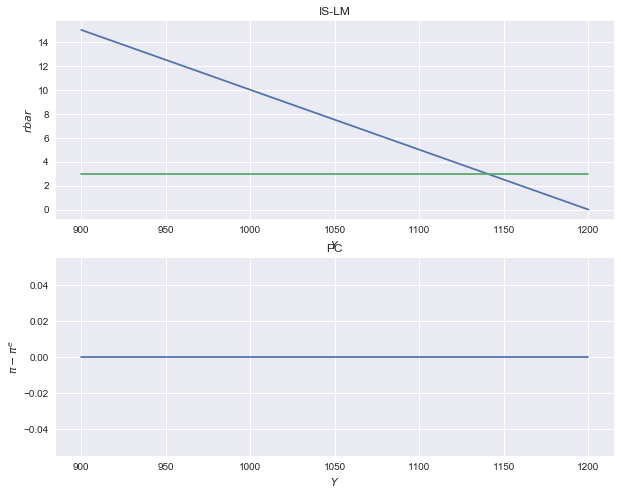

In [23]:
N = 100
 
r_vec = np.linspace(0,15,N)
y_vec = np.empty(N)
rbar_vec = np.ones(N)*3 # interest rate = 3

pi_vec = np.zeros(N)
 
for i,r_bar in enumerate(r_vec):
    r_bar = r_vec[i]
    y_vec[i] = y_func(100,0.8,100,0.4,100,0.1,10,r_bar,500)

# creates the figures
import matplotlib.pyplot as plt
plt.style.use("seaborn")

#plt.figure()
#plt.subplot(211)
#plt.plot(y_vec,r_vec,'r',y_vec,rbar_vec,'g')

#plt.subplot(212)
#plt.plot(y_vec,pi_vec,'b')

fig = plt.figure(figsize=(10,8))

fig_ISLM = fig.add_subplot(2,1,1)
fig_ISLM.plot(y_vec,r_vec)
fig_ISLM.plot(y_vec,rbar_vec)

fig_PC = fig.add_subplot(2,1,2)
fig_PC.plot(y_vec,pi_vec)

fig_ISLM.set_title('IS-LM')
fig_ISLM.set_xlabel('$Y$')
fig_ISLM.set_ylabel('$rbar$')
fig_ISLM.grid(True)

fig_PC.set_title('PC')
fig_PC.set_xlabel('$Y$')
fig_PC.set_ylabel('$\pi-\pi^e$')

#azvdfghdfgb

In [8]:
# The PC curve, and the relation between the output gap and unemployment
inf = sm.symbols('pi')
inf_e = sm.symbols('pi^e')
y_n = sm.symbols('Y_n')
alpha = sm.symbols('alpha')
l = sm.symbols('L')
u = sm.symbols('u')
u_n = sm.symbols('u_n')

eq7 = sm.Eq((inf-inf_e), ((alpha/l)*(y-y_n)))
eq8 = sm.Eq((u-u_n), (-l*(y-y_n)))

inf_func = sm.lambdify((inf_e,alpha,l,y,y_n),sm.solve(eq7,inf)[0])
u_func = sm.lambdify((u_n,l,y,y_n),sm.solve(eq8,u)[0])

inf_ = inf_func(2, 0.5, 1000, y_, 1400)
u_ = u_func(4, 1000, y_, 1400)

print(inf_, u_) 

1.9 - 0.01*rbar 20000.0*rbar + 200004.0


In [7]:
eq7

Eq(pi - pi^e, alpha*(Y - Y_n)/L)